In [20]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from KNN import KNN

Create training data:

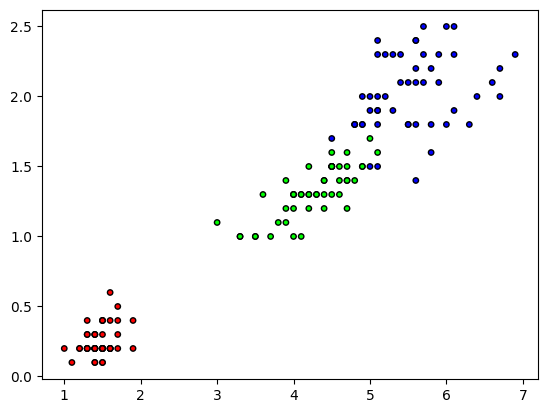

In [21]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# Dataset of flowers
# X - Data i's petal length, petal width, etc... - 2D array
# y - Data i's group (species) - array
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=15)
plt.show()

# Test data with KNN algorithm:

Check how many y labels it guessed correctly.

In [22]:
knn = KNN(5)

knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)

print(y_preds)

acc = np.sum(y_preds == y_test) / len(y_test)
print(acc)

[np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(0), np.int64(1), np.int64(1), np.int64(2), np.int64(2)]
0.9333333333333333
